<a href="https://colab.research.google.com/github/miraclehimself/Advanced_ML/blob/main/Interactions_and_Linear_Regression_week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AML 22-23 S2W4 Lecture: Interactions

## Packages

In [ ]:
!pip install --upgrade scikit-learn -q --user
# need to restart kernel, if latest versions not already installed

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 14.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set(
    style='ticks',
    context='talk',
    font_scale=0.8,
    rc={'figure.figsize': (8,6)}
)

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, ParameterGrid

In [ ]:
from sklearn.metrics import mean_squared_error
from functools import partial
rmse = partial(mean_squared_error, squared=False)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.dummy import DummyRegressor
from statsmodels.formula.api import ols

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
!pip install -q shap
import shap
shap.initjs()

## Advertisement Example

### Data

In [ ]:
adv = pd.read_csv(
    'https://raw.githubusercontent.com/gerberl/6G7V0017_2223/main/datasets/Advertising.csv',
    index_col=0
)
adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
X, y = adv.drop(columns='sales'), adv['sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### A Simple Multivariate OLS Model

#### Without Interactions

In [ ]:
adv_ols = ols("sales ~ TV + radio + newspaper", data=adv)
adv_ols = adv_ols.fit()
adv_ols.params

Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64

In [ ]:
adv_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           1.58e-96
Time:                        11:59:54   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### With Interactions

Pages 81, 87, and 88 of ISLR2.

In [ ]:
adv_ols_int = ols("sales ~ TV*radio + newspaper", data=adv)
adv_ols_int = adv_ols_int.fit()
adv_ols_int.params

Intercept    6.728412
TV           0.019067
radio        0.027992
TV:radio     0.001087
newspaper    0.001444
dtype: float64

In [ ]:
adv_ols_int.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1466.
Date:                Wed, 22 Feb 2023   Prob (F-statistic):          2.92e-144
Time:                        11:59:54   Log-Likelihood:                -270.04
No. Observations:                 200   AIC:                             550.1
Df Residuals:                     195   BIC:                             566.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7284      0.253     26.561      0.000       6.229       7.228
TV             0.0191      0.002     12.633      0.000       0.016       0.022
radio          0.0280      0.009      3.062      0.003       0.010       0.046
TV:radio       0.0011   5.26e-05     20.686      0.000       0.001       0.001
newspaper      0.0014      0.003      0.438      0.662      -0.005       0.008
==============================================================================
Omnibus:                      126.161   Durbin-Watson:                   2.216
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1123.463
Skew:                          -2.291   Prob(JB):                    1.10e-244
Kurtosis:                      13.669   Cond. No.                     1.84e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
rmse(y_test, adv_ols.predict(X_test))

2.050499607571729

In [ ]:
rmse(y_test, adv_ols_int.predict(X_test))

1.2510078953600354

### The Scikit-Learn Way for Generating Interaction Features

In [ ]:
X_train.head()

,TV,radio,newspaper
135,36.9,38.6,65.6
67,31.5,24.6,2.2
27,142.9,29.3,12.6
114,209.6,20.6,10.7
169,215.4,23.6,57.6


In [ ]:
preprocessing_pipe = Pipeline(
    steps=[
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(interaction_only=True, include_bias=False))
    ]
).set_output(transform='pandas')

In [ ]:
preprocessing_pipe.fit_transform(X_train).head()

,TV,radio,newspaper,TV radio,TV newspaper,radio newspaper
135,-1.341553,1.035518,1.659411,-1.389202,-2.226188,1.718349
67,-1.405314,0.082496,-1.306297,-0.115933,1.835758,-0.107764
27,-0.089952,0.402439,-0.819809,-0.036200,0.073743,-0.329923
114,0.697613,-0.189796,-0.908687,-0.132404,-0.633912,0.172465
169,0.766097,0.014423,1.285189,0.011049,0.984579,0.018536


In [ ]:
X_train_pp = preprocessing_pipe.fit_transform(X_train)

In [ ]:
X_train_pp.head()

,TV,radio,newspaper,TV radio,TV newspaper,radio newspaper
135,-1.341553,1.035518,1.659411,-1.389202,-2.226188,1.718349
67,-1.405314,0.082496,-1.306297,-0.115933,1.835758,-0.107764
27,-0.089952,0.402439,-0.819809,-0.036200,0.073743,-0.329923
114,0.697613,-0.189796,-0.908687,-0.132404,-0.633912,0.172465
169,0.766097,0.014423,1.285189,0.011049,0.984579,0.018536


In [ ]:
X_train['radio'].mean(), X_train['radio'].std()

(23.388125000000002, 14.736240237471632)

In [ ]:
# mean centered; unit variance
X_train_pp['radio'].mean(), X_train_pp['radio'].std()

(-1.554312234475219e-16, 1.003139725151038)

### A Simple Lasso Model

In [ ]:
pipe = Pipeline(
    steps=[
        ('pp', preprocessing_pipe),
        ('regr', Lasso())
    ]
)

In [ ]:
param_grid = dict(
    regr__alpha=np.logspace(-3, 3, 7)
)

In [ ]:
grid = GridSearchCV(
    pipe, param_grid, return_train_score=True,
    scoring='neg_root_mean_squared_error'
)

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('pp',
                                        Pipeline(steps=[('scaler',
                                                         StandardScaler()),
                                                        ('poly',
                                                         PolynomialFeatures(include_bias=False,
                                                                            interaction_only=True))])),
                                       ('regr', Lasso())]),
             param_grid={'regr__alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [ ]:
results = pd.DataFrame(grid.cv_results_)

In [ ]:
results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_regr__alpha', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [ ]:
results[
    [ 'param_regr__alpha', 'mean_test_score', 'std_test_score',
      'mean_train_score', 'std_train_score', 'rank_test_score' ]
].sort_values('rank_test_score').rename(
    columns=dict(
        param_regr__alpha='alpha'
    )
)

,alpha,mean_test_score,std_test_score,mean_train_score,std_train_score,rank_test_score
1,0.01,-0.861649,0.102655,-0.815908,0.026925,1
0,0.001,-0.862298,0.100012,-0.815427,0.026956,2
2,0.1,-0.868430,0.115972,-0.843808,0.029096,3
3,1.0,-1.931782,0.269187,-1.885347,0.022862,4
4,10.0,-5.062748,0.431197,-5.078121,0.102097,5
5,100.0,-5.062748,0.431197,-5.078121,0.102097,5
6,1000.0,-5.062748,0.431197,-5.078121,0.102097,5


In [ ]:
best_pipe = grid.best_estimator_

In [ ]:
print(best_pipe)

Pipeline(steps=[('pp',
                 Pipeline(steps=[('scaler', StandardScaler()),
                                 ('poly',
                                  PolynomialFeatures(include_bias=False,
                                                     interaction_only=True))])),
                ('regr', Lasso(alpha=0.01))])


In [ ]:
best_pipe['regr'].feature_names_in_

array(['TV', 'radio', 'newspaper', 'TV radio', 'TV newspaper',
       'radio newspaper'], dtype=object)

In [ ]:
best_pipe['regr'].coef_

array([ 3.70821066,  2.85411541,  0.04392466,  1.34211742, -0.1011905 ,
       -0.04659524])

In [ ]:
pd.DataFrame(
    zip(
        best_pipe['regr'].coef_,
        best_pipe['regr'].feature_names_in_
    ),
    columns=['coef', 'feat']
).sort_values(by='coef', key=np.abs, ascending=False)

,coef,feat
0,3.708211,TV
1,2.854115,radio
3,1.342117,TV radio
4,-0.101190,TV newspaper
5,-0.046595,radio newspaper
2,0.043925,newspaper


In [ ]:
rmse(y_test, best_pipe.predict(X_test))

1.2715538437365144

In [ ]:
scores = cross_val_score(best_pipe, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
scores.mean(), scores.std()

(-0.8616486020114694, 0.10265497903659414)

### SHAP

In [ ]:
X_pp = best_pipe['pp'].transform(X_test)

In [ ]:
X100 = shap.utils.sample(X_pp, 100) # 100 instances for use as the background distribution

In [ ]:
explainer = shap.Explainer(best_pipe['regr'].predict, X100)
shap_values = explainer(X_pp)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


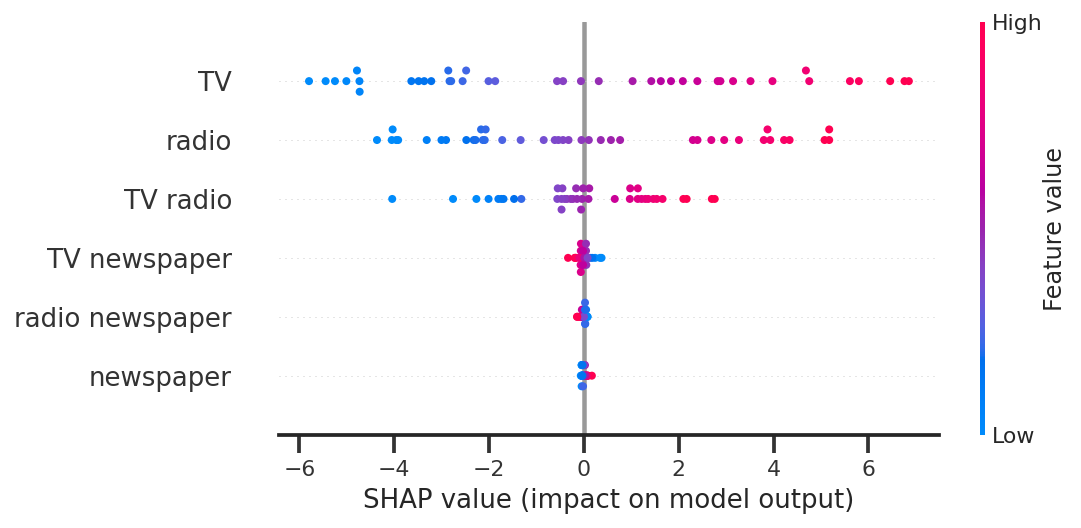

In [ ]:
shap.summary_plot(shap_values, X_pp, max_display=8)

In [ ]:
X_test.head()

,TV,radio,newspaper
19,69.2,20.5,18.3
171,50.0,11.6,18.4
108,90.4,0.3,23.2
99,289.7,42.3,51.2
178,170.2,7.8,35.2


In [ ]:
X_pp.head()

,TV,radio,newspaper,TV radio,TV newspaper,radio newspaper
19,-0.960169,-0.196603,-0.553176,0.188772,0.531142,0.108756
171,-1.186874,-0.802453,-0.548498,0.952411,0.650998,0.440144
108,-0.709849,-1.571677,-0.323965,1.115653,0.229966,0.509168
99,1.643399,1.287388,0.985811,2.115692,1.620082,1.269121
178,0.232395,-1.061130,0.237368,-0.246601,0.055163,-0.251878


In [ ]:
pd.DataFrame(shap_values.values, columns=X_pp.columns).head()

,TV,radio,newspaper,TV radio,TV newspaper,radio newspaper
0,-2.799609,-0.440548,-0.028699,0.112549,-0.069379,0.019237
1,-3.640280,-2.169713,-0.028493,1.137441,-0.081508,0.003796
2,-1.871368,-4.365169,-0.018631,1.356532,-0.038903,0.000580
3,6.854970,3.794933,0.038901,2.698701,-0.179570,-0.034831
4,1.622670,-2.908008,0.006025,-0.471773,-0.021215,0.036041


In [ ]:
y_test.mean()

13.242499999999998

In [ ]:
y_test.iloc[3]

25.4

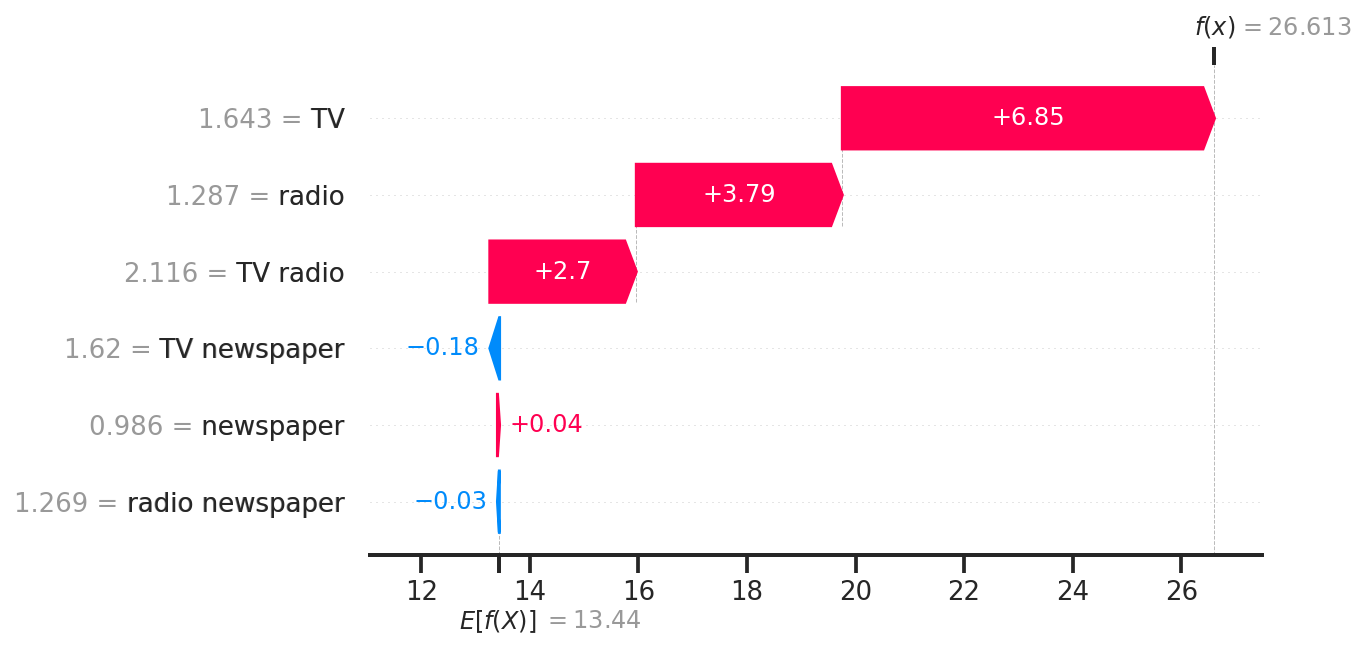

In [ ]:
shap.plots.waterfall(shap_values[3])

## The Bike Rides Dataset

* from https://github.com/christophM/interpretable-ml-book/blob/master/data/bike.csv

* it has already been pre-processed with some useful feature engineering.

In [ ]:
rides_full = pd.read_csv(
    'https://raw.githubusercontent.com/christophM/interpretable-ml-book/master/data/bike.csv'
)

In [ ]:
rides_full.head(1)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,days_since_2011
0,WINTER,2011,JAN,NO HOLIDAY,SAT,NO WORKING DAY,MISTY,8.175849,80.5833,10.749882,985,0


In [ ]:
rides = rides_full.select_dtypes(exclude=object)

In [ ]:
rides.head()

,yr,temp,hum,windspeed,cnt,days_since_2011
0,2011,8.175849,80.5833,10.749882,985,0
1,2011,9.083466,69.6087,16.652113,801,1
2,2011,1.229108,43.7273,16.636703,1349,2
3,2011,1.400000,59.0435,10.739832,1562,3
4,2011,2.666979,43.6957,12.522300,1600,4


In [ ]:
rides = rides.drop(columns='yr')

In [ ]:
X, y = rides.drop(columns='cnt'), rides['cnt']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
preprocessing_pipe = Pipeline(
    steps=[
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(interaction_only=True, include_bias=False))
    ]
).set_output(transform='pandas')

In [ ]:
pipe = Pipeline(
    steps=[
        ('pp', preprocessing_pipe),
        ('regr', Lasso(alpha=0.01))
    ]
)

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('pp',
                 Pipeline(steps=[('scaler', StandardScaler()),
                                 ('poly',
                                  PolynomialFeatures(include_bias=False,
                                                     interaction_only=True))])),
                ('regr', Lasso(alpha=0.01))])

In [ ]:
rmse(y_test, pipe.predict(X_test))

1076.723161813193

In [ ]:
y.describe()

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

In [ ]:
rmse(y_test, DummyRegressor().fit(X_train, y_train).predict(X_test))

2062.807107512284

In [ ]:
pd.DataFrame(
    zip(
        pipe['regr'].coef_,
        pipe['regr'].feature_names_in_
    ),
    columns=['coef', 'feat']
).sort_values(by='coef', key=np.abs, ascending=False)

,coef,feat
0,1127.165938,temp
3,1053.239759,days_since_2011
1,-397.427224,hum
2,-245.672232,windspeed
6,212.924921,temp days_since_2011
8,-192.381527,hum days_since_2011
5,146.437572,temp windspeed
7,-142.043397,hum windspeed
9,-83.681084,windspeed days_since_2011
4,70.242428,temp hum


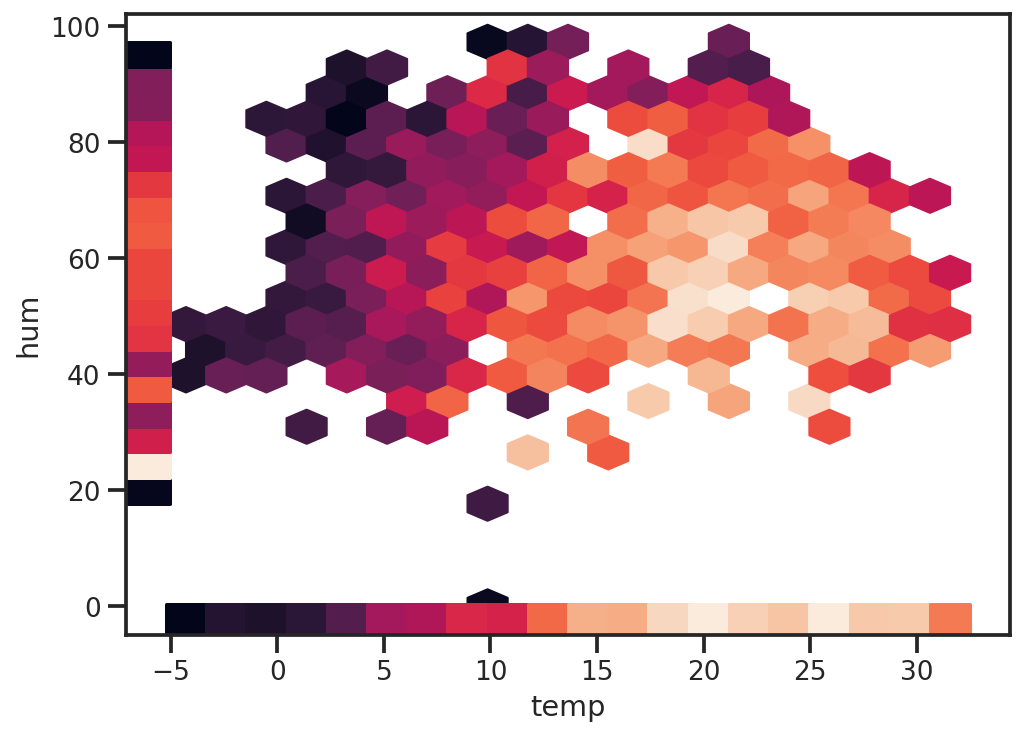

In [ ]:
fig, ax = plt.subplots(figsize=(7,5), constrained_layout=True)
ax.hexbin(rides['temp'], rides['hum'], C=rides['cnt'], gridsize=20, marginals=True)
ax.set_xlabel('temp')
ax.set_ylabel('hum');